# **Introduction:**
Healthcare companies depend heavily on accurate cost estimation for managing patient bills and setting insurance. Medical charges depend on various factors such as age, body mass index, lifestyle, and family size. The objective of this project is to develop a predictive model that estimates the individual medical insurance charges using artificial intelligence, allowing more accurate and data-driven cost prediction.

# **Dataset introduction:**
This data set is being used to predict medical insurance cost using linear regression. It contains information such as a persons age, sex, body mass index (BMI), number of children, smoking status, and region. The column charges is the true label or target variable. All the other columns are input features which are used by the model to predict the charges.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("/content/medical_cost.csv")
len(data)

1338

In [3]:
data.head(5)

,Unnamed: 0,age,sex,bmi,children,smoker,region,charges
0,1,19,female,27.900,0,yes,southwest,16884.92400
1,2,18,male,33.770,1,no,southeast,1725.55230
2,3,28,male,33.000,3,no,southeast,4449.46200
3,4,33,male,22.705,0,no,northwest,21984.47061
4,5,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1338 non-null   int64  
 1   age         1338 non-null   int64  
 2   sex         1338 non-null   object 
 3   bmi         1338 non-null   float64
 4   children    1338 non-null   int64  
 5   smoker      1338 non-null   object 
 6   region      1338 non-null   object 
 7   charges     1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [5]:
#checkin for null values
data.isnull().sum()
#no null values

,0
Unnamed: 0,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [6]:
#checking data types of features
data.dtypes

,0
Unnamed: 0,int64
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


Histogram is used to evaluate the distribution and skewness of charges and to determine whether a log transformation is needed.

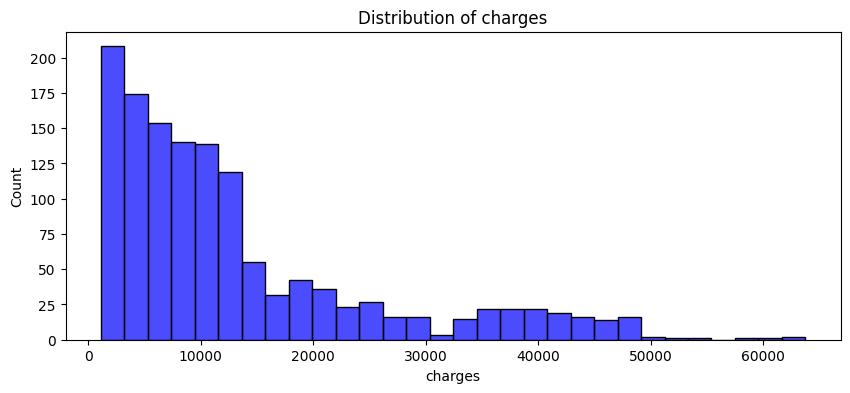

In [7]:
plt.figure(figsize=(10, 4))
sns.histplot(data.charges, alpha = 0.7, color = 'blue')
plt.title("Distribution of charges")
plt.show()

The distrubution of charges is skewed so log transformation is required.


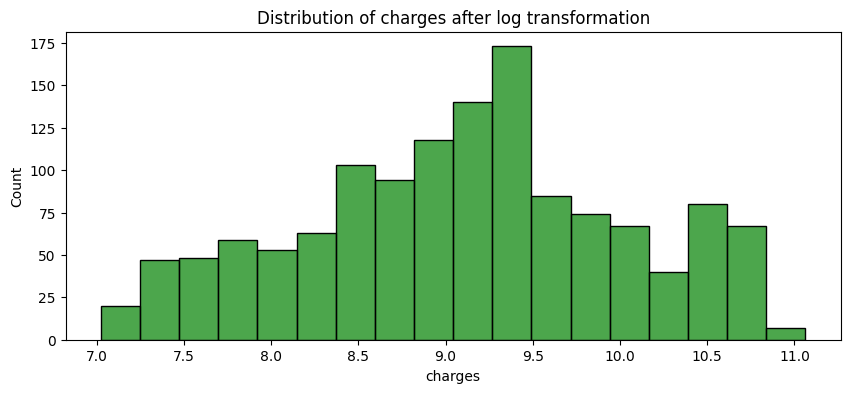

In [8]:
plt.figure(figsize=(10, 4))
sns.histplot(np.log1p(data.charges), alpha= 0.7, color = 'green')
plt.title("Distribution of charges after log transformation")
plt.show()

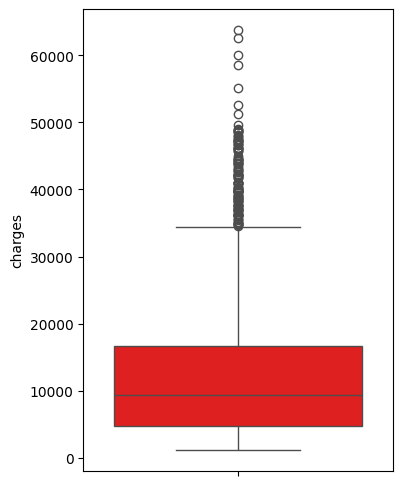

In [9]:
plt.figure(figsize= (4, 6))
sns.boxplot(data.charges, color = 'red')
plt.show()

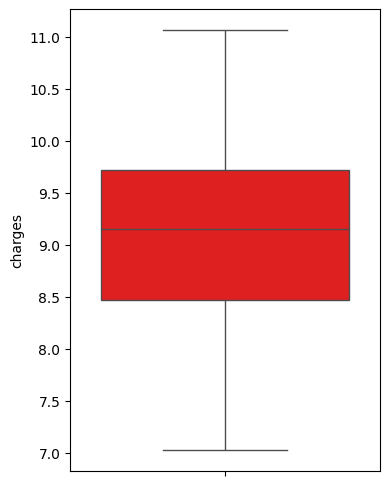

In [10]:
#log tansformation normalizes the data, reducing extremes
plt.figure(figsize= (4, 6))
sns.boxplot(np.log1p(data.charges), color = 'red')
plt.show()

In [11]:
#adding new col to data
data['log_charges'] = np.log1p(data.charges)
data.head(5)

,Unnamed: 0,age,sex,bmi,children,smoker,region,charges,log_charges
0,1,19,female,27.900,0,yes,southwest,16884.92400,9.734236
1,2,18,male,33.770,1,no,southeast,1725.55230,7.453882
2,3,28,male,33.000,3,no,southeast,4449.46200,8.400763
3,4,33,male,22.705,0,no,northwest,21984.47061,9.998137
4,5,32,male,28.880,0,no,northwest,3866.85520,8.260455


In [12]:
data.log_charges.skew()
#very slightly negatively skewed after log transformation

np.float64(-0.08981728740026822)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
#features and target
X = data[['sex', 'smoker', 'bmi', 'age', 'children']]
y = data['log_charges']

#train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

#check shapes
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1070, 5) (268, 5)
(1070,) (268,)


Using one-hot encoding to convert categorical variables into binary numeric columns.

In [15]:
from sklearn.preprocessing import OneHotEncoder

In [16]:
#one-hot encoding
cat_features = ['sex', 'smoker']
encoder = OneHotEncoder(drop='first', sparse_output=False)

X_train_cat = encoder.fit_transform(X_train[cat_features])
X_test_cat = encoder.transform(X_test[cat_features])

In [17]:
#numeric features
num_features = ['bmi', 'age', 'children']
X_train_num = X_train[num_features].values
X_test_num = X_test[num_features].values

#combining all numerical and categorical features
X_train_final = np.hstack([X_train_num, X_train_cat])
X_test_final = np.hstack([X_test_num, X_test_cat])


In [18]:
from sklearn.linear_model import LinearRegression
#Linear regression model

model = LinearRegression()
model.fit(X_train_final, y_train)

LinearRegression()

In [19]:
#predictions
y_train_pred = model.predict(X_train_final)
y_test_pred = model.predict(X_test_final)

Using RMSE to evaluate the regression model, as it measures the average deviation of predicted values from the true labels


In [20]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))
print('RMSE TRAIN:', rmse(y_train, y_train_pred))
print('RMSE TEST:', rmse(y_test, y_test_pred))

RMSE TRAIN: 0.44697858006214647
RMSE TEST: 0.446859595220759


An RMSE of 0.44 indicates that the model's predictions are very close to the actual values, which are in thousands. It shows excellent performance of the model.

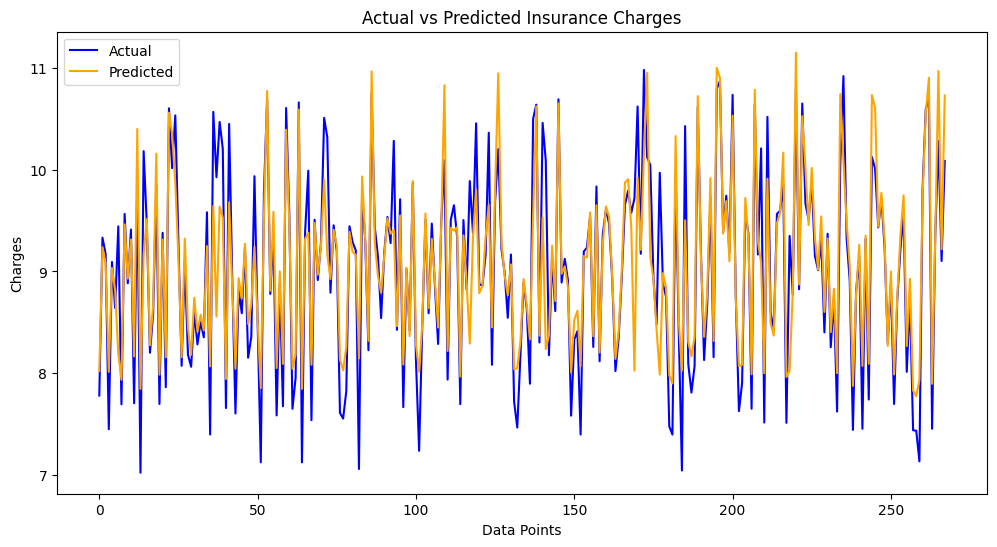

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

#line chart
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_test_pred, label='Predicted', color='orange')

plt.xlabel("Data Points")
plt.ylabel("Charges")
plt.title("Actual vs Predicted Insurance Charges")
plt.legend()
plt.show()